                           Aula 3: Visualização de Dados

import do nosso arquivo de funções 

In [61]:
import funcoes

Chamada da nossa função que carrega e higieniza o dataset na memória

In [62]:
base_de_dados = funcoes.carregar_dados()

Visualizando os dados

In [63]:
base_de_dados.head()

,ano,senioridade,Contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio Porte
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio Porte
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio Porte
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio Porte
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio Porte


-> Criação de gráficos usando a função plot do pandas. A função
recebe como argumento o kind (tipo do gráfico) e o title (titulo do
gráfico).

-> A ideia é criar um gráfico usando a frequência de cada senioridade

-> ['senioridade']: Coluna que contém os valores que serão utilizados no gráfico

-> value_counts: Irá contar a frequência de cada valor único da coluna


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

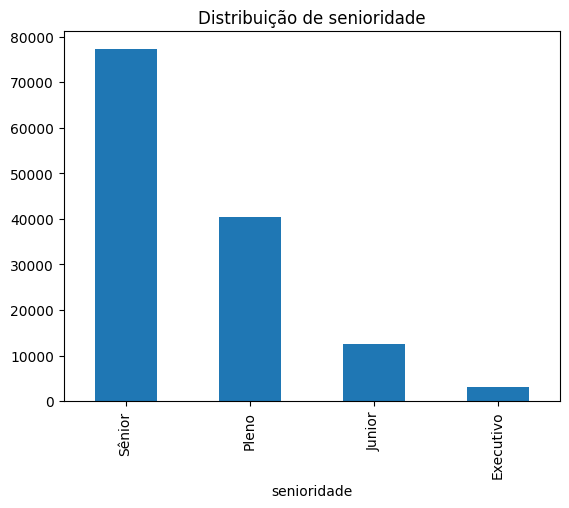

In [80]:
base_de_dados['senioridade'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

Import das bibliotecas necessárias para construção de gráficos

-> matplotlib.pyplot: Biblioteca necessária para criar e manipular (como
adicionar titulos, rotulos, alterar tamanho, etc) e exibir gráficos

-> seaborn: Biblioteca que possui inúmeros tipos de gráficos

In [65]:
import matplotlib.pyplot as plt

import seaborn as sns

                Criando gráficos com o seaborn e o matplotlib

-> A idéia é criar um gráfico de barras que mostra a média 
salarial em dolar por senioridade.

-> plt.title: Função do matplotlib que define os titulos do gráfico

-> sns.barplot: função do seaborn que constroi gráficos de barras.
A função recebe como argumento: data (base de dados análisada), 
x (coluna que irá conter os valores do eixo x), y (coluna que irá
conter os valores do eixo y)

-> plt.show(): Função do matplotlib que exibe o gráfico na tela

-> Observação: Por padrão o barplot calcula a média dos valores numéricos.



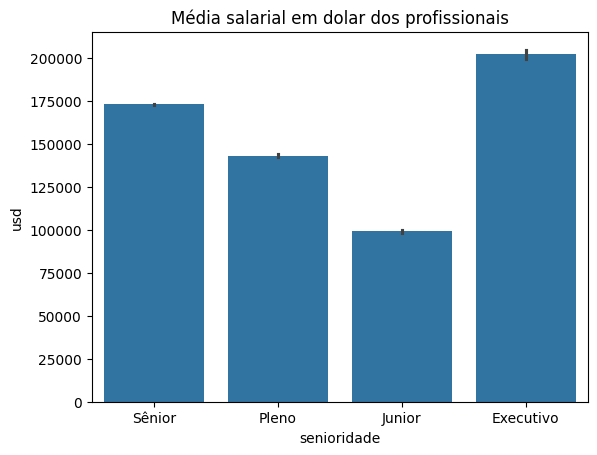

In [66]:
plt.title('Média salarial em dolar dos profissionais')
sns.barplot(data=base_de_dados, x='senioridade', y='usd')

plt.show()

-> O objetivo desse trecho é adicionar ao gráfico anterior alguns
elementos a mais que tornam a visibilidade do gráfico um pouco melhor

-> Plt.figure: Irá definir o tamanho da imagem do gráfico (largura e altura).
A função recebe como argumento o figsize que irá receber 2 valores: a largura e a altura.

-> plt.xlabel: Ira definir os rótulos do eixo x

-> plt.ylabel: Irá definir os rótulos do eixo y

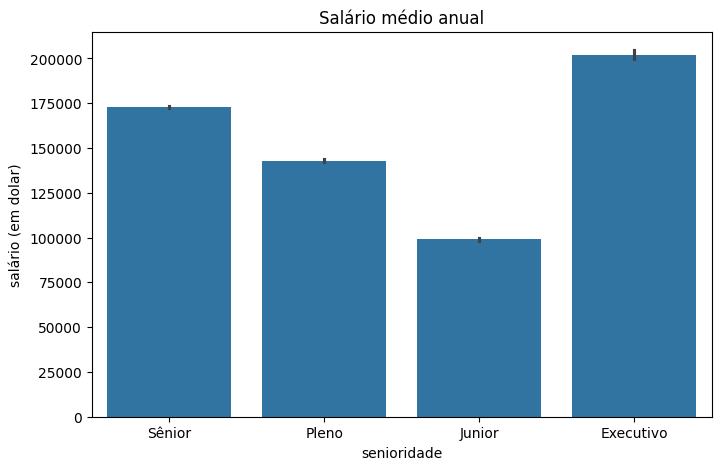

In [67]:
plt.figure(figsize=(8,5))

sns.barplot(data=base_de_dados, x='senioridade', y='usd')

plt.title("Salário médio anual")

plt.xlabel("senioridade")

plt.ylabel("salário (em dolar)")

plt.show()

                Melhorando ainda mais a visualização do gráfico
    
-> Para deixar a visualização melhor, vamos criar um conjunto de passos
que ira mostrar as barras (e os seus rótulos) em ordem decrescente

-> 1° passo: Vamos agrupar os dados por senioridade para calcular as médias
salariais.

-> 2° passo: Após o cálculo da média, iremos ordenar os dados em ordem
decrescente.

-> groupby: Função do pandas que irá agrupar os dados por uma determinada coluna.

-> senioridade: Coluna que será agrupada.

-> mean: Função do pandas wue calcula a média de variáveis numéricas

-> usd: Variável que terá a média calculada

-> sort_values: Função do pandas que tem como objetivo ordenar os dados em ordem crescente ou descrecente. No nosso caso, iremos ordenar em ordem decrescente, para isso, iremos passar como argumento para a função o
ascending de valor False, dessa forma a função ordenara em ordem descrescente


In [68]:
agrupamento_salario = base_de_dados.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

print(agrupamento_salario)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64


-> 3° passo: Nessa etapa iremos apenas acessar os indices das colunas de senioridade. Ela servirá de base para o nosso gráfico entender como ele
deve organizar as barras e os rótulos passados pelo desenvolvedor

In [69]:
ordem =  base_de_dados.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

-> 4° Passo: Utilizaremos o argumento order do barplot que tem como
objetivo definir a maneira que o gráfico ordenará os dados. Ele irá
receber como valor a variável ordem que contém a maneira que organizamos 
os dados.

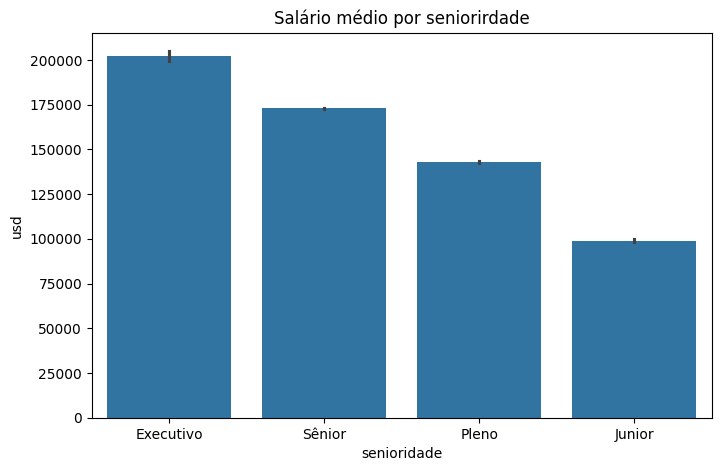

In [81]:
plt.figure(figsize=(8,5))

plt.title("Salário médio por seniorirdade")

sns.barplot(data=base_de_dados, x='senioridade', y = 'usd', order=ordem)

plt.show()

-> histplot: Função do seaborn que tem como objetivo mostrar a frequência
(distribuição) de variáveis. A função recebe como argumento:

-> bins: Define o intervalo que o gráfico irá mostrar os valores

-> Kde: Recebe um valor booleano que define se o gráfico mostra ou não
a linha de distribuição dos dados

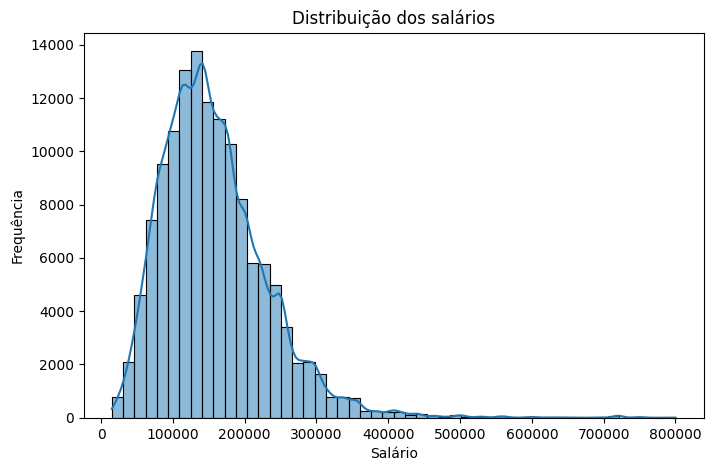

In [71]:
plt.figure(figsize=(8,5))

plt.title("Distribuição dos salários")

sns.histplot(base_de_dados['usd'], bins=50, kde=True)

plt.xlabel('Salário')

plt.ylabel('Frequência')

plt.show()

                        Criação do boxplot da coluna de salários

-> Boxplot: Gráfico que tem como objetivo mostrar uma distriuição estatistica
como:

-> a mediana: Valor que divide os dados em 50%

-> Valor minimo: Menor valor da coluna (que não são outliers)

-> Valor máximo: Maior valor da coluna (que não são outliers)

-> Outliers: Valores descrepantes que estão fora do padrão de valores da coluna

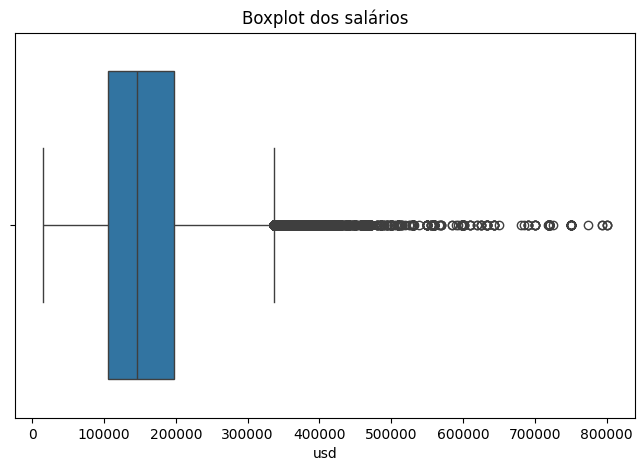

In [82]:

plt.figure(figsize=(8,5))

sns.boxplot(x = base_de_dados['usd'])

plt.title('Boxplot dos salários')

plt.show()

                    Criação do boxplot de salários por senioridade

-> ordem_senioridade: Irá conter a ordem dos rótulos fo eixo x (que
irá receber a coluna de senioridade). Essa variável irá receber uma
lista com os rótulos dos valores categóricos da coluna.

-> pallete: Tem como objetivo definir uma paleta de cores para as barras
dos gráficos, ela pode receber como valor um paletta pronta ou uma paleta
"personalizada" (onde criamos uma lista que irá conter as cores de cada barra).

hue: Ira indicar a coluna que deve receber a paleta de cores

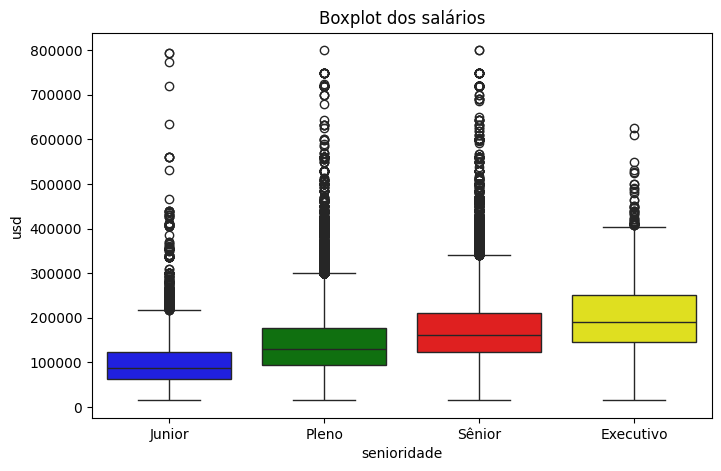

In [73]:
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))

sns.boxplot(data = base_de_dados, x = 'senioridade', y = 'usd', order=ordem_senioridade, palette = ['red', 'green', 'blue', 'yellow'], hue='senioridade')

plt.title('Boxplot dos salários')

plt.show()

Biblioteca que tem como objetivo criar mapas interativos que possibilitam que
o usuário visualize com exatidão os valores apresentados

In [74]:
import plotly.express as px

Para começar, vamos criar um gráfico de média de salário por senioridade

-> Primeiro, vamos agrupar os dados por senioridade

-> Após agrupar os dados vamos calcular a média de salário de cada
senioridade.

-> Por último, vamos organizar o agrupamento em ordem decrescente (da maior média a menor média)

-> reset_index: Ira criar uma coluna para os indices de senioridade (alvo do 
agrupamento)

In [75]:
senioridade_media_salario = base_de_dados.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

senioridade_media_salario

,senioridade,usd
0,Executivo,202027.667813
1,Sênior,172850.838301
2,Pleno,143044.845979
3,Junior,99034.963267


                Construindo o grfaico usando o plotly
    
-> bar: Função do plotly que tem como objetivo criar o gráfico de barras
interativo. A função recebe como argumento:

-> senioridade_media_salario: base de dados (agrupamentos que criamos) que irá
conter os valores que construirão o gráfico.

-> x: Ira conter os valores do eixo x (coluna senioridade do agrupamento)

-> y: Ira conter os valores do eixo y (coluna usd que contém as médias dos  salários do agrupamento)

-> title: Irá definir o titulo do gráfico

-> labels: Irá conter os rótulos do gráfico

-> fig.show(): Irá apresentar o gráfico na tela

In [76]:
fig = px.bar(
    
    senioridade_media_salario,
    
    x = 'senioridade',
    
    y = 'usd',
    
    title = 'média por senioridade',
    
    labels = {'Senioridade': 'Nivel de Senioridade', 'USD':'Nivel Salárial Anual(USD)'}
    
)

fig.show()

                    Construindo um gráfico de pizza com o plotly

-> Pie: Função que tem como objetivo criar um grafico de pizza

-> remoto_contagem: ira conter os valores da coluna 'remoto' e será
a base de dados utilizada na construção do gráfico

-> value_counts: Ira contar os valores únicos da coluna "remoto"

-> reset_index: Ira criar uma coluna para os indices da coluna
"remoto".

-> remoto_contagem.columns: Ira renomear as colunas da base de dados

-> names: nome dos dados categóricos

-> values: nome dos dados numericos 

-> title: Titulo do gráfico

In [77]:
remoto_contagem = base_de_dados['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']

fig = px.pie(
    
    remoto_contagem,
        
    names = 'Tipo_Trabalho',
    
    values = 'Quantidade',
    
    title = 'Proporção dos tipos de trabalho'
)

fig.show()

-> hole: Tem como objetivo abrir um buraco no meio do gráfico de pizza.
Essa função recebe como argumento um valor numérico entre 0 e 1 que irá definir o tamanho do buraco.

In [78]:
remoto_contagem = base_de_dados['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']

fig = px.pie(
    
    remoto_contagem,
        
    names = 'Tipo_Trabalho',
    
    values = 'Quantidade',
    
    title = 'Proporção dos tipos de trabalho',
    
    hole= 0.5
)

fig.show()

fig.update_traces(textinfo = 'percent + label' ); Tem como objetivo mostrar os rótulos e as porcentagens no gráfico

In [79]:
remoto_contagem = base_de_dados['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']

fig = px.pie(
    
    remoto_contagem,
        
    names = 'Tipo_Trabalho',
    
    values = 'Quantidade',
    
    title = 'Proporção dos tipos de trabalho'
)

fig.update_traces(textinfo = 'percent + label' )

fig.show()